Project: Stock Data

Question 1

In [47]:
import yfinance as yf
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period='max')
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2

In [72]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", {"class": "historical_data_table table"})

t_dates = []
t_revenues = []

for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        t_dates.append(date)
        t_revenues.append(float(revenue))

tesla_revenue = pd.DataFrame({"Date": t_dates, "Revenue (in millions)": t_revenues})

tesla_revenue.tail()

,Date,Revenue (in millions)
11,2013,2013.0
12,2012,413.0
13,2011,204.0
14,2010,117.0
15,2009,112.0


Question 3

In [49]:
import yfinance as yf
gamestop = yf.Ticker('GME')
gamestop_data = gamestop.history(period='max')
gamestop_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4

In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

table = soup.find("table", {"class": "historical_data_table table"})

g_dates = []
g_revenues = []

for row in table.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        g_dates.append(date)
        g_revenues.append(float(revenue))

gamestop_revenue = pd.DataFrame({"Date": g_dates, "Revenue (in millions)": g_revenues})

gamestop_revenue.tail()

,Date,Revenue (in millions)
11,2013,8887.0
12,2012,9551.0
13,2011,9474.0
14,2010,9078.0
15,2009,8806.0


Question 5

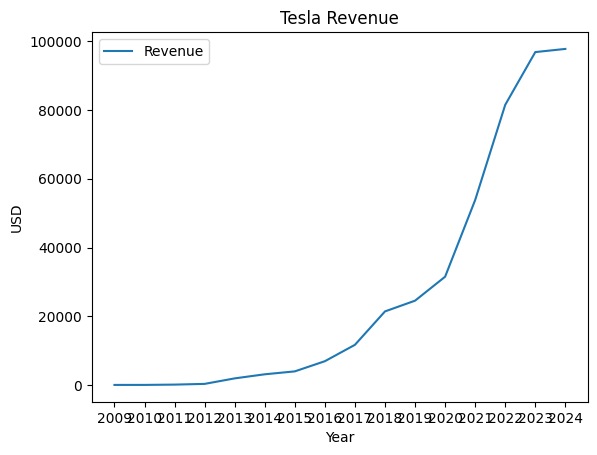

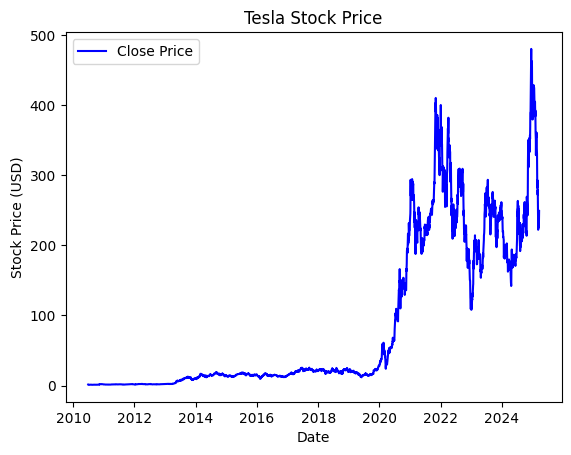

In [74]:
import matplotlib.pyplot as plt

plt.plot(t_dates[::-1], t_revenues[::-1])
plt.title('Tesla Revenue')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend(['Revenue'])
plt.show()

plt.plot(tesla_data.index, tesla_data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Tesla Stock Price')
plt.legend()
plt.show()

Question 6

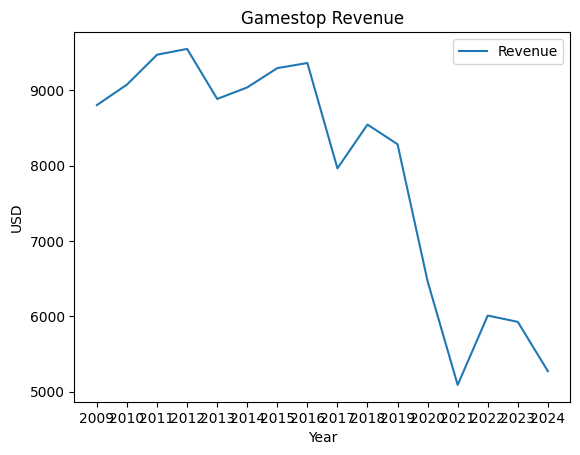

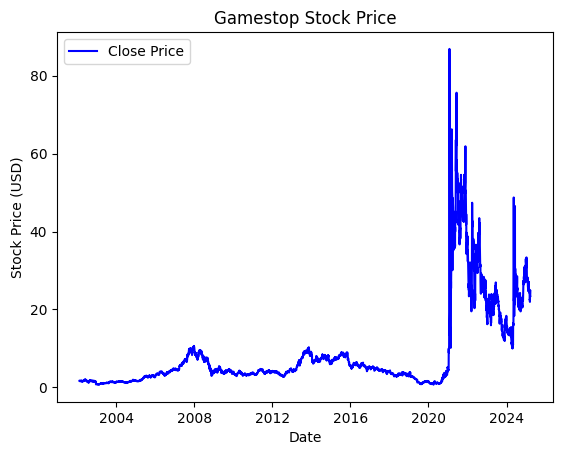

In [75]:
import matplotlib.pyplot as plt

plt.plot(g_dates[::-1], g_revenues[::-1])
plt.title('Gamestop Revenue')
plt.xlabel('Year')
plt.ylabel('USD')
plt.legend(['Revenue'])
plt.show()

plt.plot(gamestop_data.index, gamestop_data['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Gamestop Stock Price')
plt.legend()
plt.show()